In [1]:
import pandas as pd#导入csv文件的库
import numpy as np#进行矩阵运算的库
import matplotlib.pyplot as plt#导入绘图库

import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM

import warnings#避免一些可以忽略的报错
warnings.filterwarnings('ignore')#filterwarnings()方法是用于设置警告过滤器的方法，它可以控制警告信息的输出方式和级别.

Using TensorFlow backend.
/home/tmp/anaconda3/envs/tttf/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/tmp/anaconda3/envs/tttf/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/tmp/anaconda3/envs/tttf/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/tmp/anaconda3/envs/tttf/lib/p

In [40]:
train_df=pd.read_csv("train_set.csv",parse_dates = ["date"],index_col = [0])
val_df=pd.read_csv("validation_set.csv",parse_dates = ["date"],index_col = [0])
test_df=pd.read_csv("test_set.csv",parse_dates = ["date"],index_col = [0])

a_df = pd.concat((train_df, val_df), axis=0, join='inner')
all_df = pd.concat((a_df, test_df), axis=0, join='inner')


In [3]:
ot_tr = train_df['OT'].values
ot_val = val_df['OT'].values
ot_ts = test_df['OT'].values

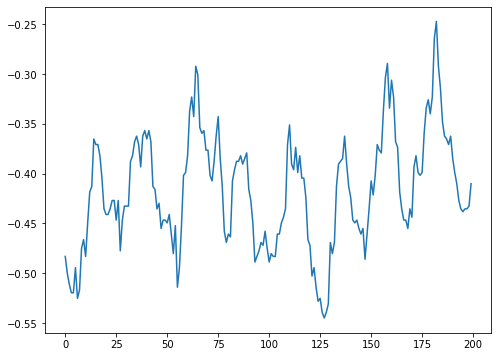

In [51]:
from sklearn.preprocessing import MinMaxScaler
# 创建MinMaxScaler对象
scaler = MinMaxScaler(feature_range = (-1, 1))

# 将数据进行归一化
all_df2 = scaler.fit_transform(all_df)
train_df = all_df2[:8640]
val_df = all_df2[8640:11616]
test_df = all_df2[11616:]

ot_ds = test_df[:,[-1]]

plt.figure(figsize=(8,6))
plt.plot([i for i in range(200)],ot_ds[:200])
plt.show()
plt.close()

In [9]:
def split_data2(data,time_step=336):  # I = 336
    datax=[]
    datay=[]
    for i in range(len(data)-time_step):
        datax.append(data[i:i+time_step])
        datay.append(data[i+time_step])
    datax=np.array(datax).reshape(len(datax),time_step,-1)
    datay=np.array(datay)
    return datax,datay

In [10]:
train_x2,train_y2=split_data2(train_df,time_step=336)
print(f"train_x2.shape:{train_x2.shape},train_y2.shape:{train_y2.shape}")

val_x2,val_y2=split_data2(val_df,time_step=336)
print(f"val_x2.shape:{val_x2.shape},val_y2.shape:{val_y2.shape}")

test_x2,test_y2=split_data2(test_df,time_step=336)
print(f"test_x2.shape:{test_x2.shape},test_y2.shape:{test_y2.shape}")

train_x2.shape:(8304, 336, 7),train_y2.shape:(8304, 7)
val_x2.shape:(2640, 336, 7),val_y2.shape:(2640, 7)
test_x2.shape:(2640, 336, 7),test_y2.shape:(2640, 7)


In [11]:
print("trainX[0]-- \n",train_x2[0])
print("trainY[0]-- ",train_y2[0])

trainX[0]-- 
 [[ 0.17645431 -0.09011433  0.19892119 ...  0.113153    0.22753002
   0.38203526]
 [ 0.17026048 -0.08110291  0.19347618 ...  0.10055753  0.24156671
   0.27246594]
 [ 0.14548525 -0.12616006  0.18263704 ...  0.02519097  0.17228892
   0.27246594]
 ...
 [ 0.29103979 -0.27020848  0.38339018 ... -0.113153    0.06225947
   0.35955439]
 [ 0.28174906 -0.25218562  0.39422931 ... -0.207516    0.02060224
   0.37640503]
 [ 0.37461004 -0.01802287  0.50633557 ... -0.22011152  0.03463889
   0.41573662]]
trainY[0]--  [0.51702144 0.18022863 0.54612999 0.18951345 0.23270699 0.28277112
 0.41290159]


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 128)               69632     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 7)                 903       
Total params: 87,047
Trainable params: 87,047
Non-trainable params: 0
_________________________________________________________________
Train on 8304 samples, validate on 2640 samples
Epoch 1/40
8304/8304 [==============================] - 293s 35ms/step - loss: 0.0925 - val_loss: 0.0898
Epoch 2/40
8304/8304 [==============================] - 301s 36ms/step - loss: 0.0647 - val_loss: 0.0800
Epoch 3/40
8304/8304 [==============================] - 291s 35ms/step - loss: 0.0610 - val_loss: 0.0755
Epoch 4/40
8304/8

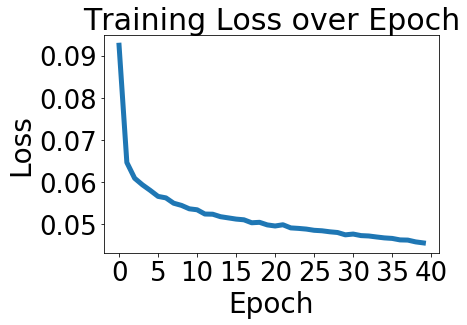

Final loss value: 0.04563383516893221


In [59]:
# LSTM Model 2 

x2 = train_x2
y2 = train_y2
in_dim2 = (336,7)
out_dim = 7

model2 = Sequential()

model2.add(LSTM(units=128, input_shape=in_dim2, activation="relu")) 
model2.add(Dense(128, activation="relu"))
model2.add(Dense(out_dim))

model2.compile(loss='mae', optimizer='adam')  
model2.summary()

hist2 = model2.fit(x2, y2, epochs=40, validation_data = (val_x2,val_y2), verbose=1)

plt.plot([i for i in range(len(hist2.history['loss']))], hist2.history['loss'], linewidth=5)
plt.title('Training Loss over Epoch', fontdict={'size'   : 30})
plt.ylabel('Loss', fontdict={'size'   : 28})
plt.xlabel('Epoch', fontdict={'size'   : 28})
plt.xticks(size = 26)
plt.yticks(size = 26)
plt.show()
print('Final loss value:', hist2.history['loss'][-1])

In [65]:

# Forecast 
import random

mae = []
mse = []
for i in range(5):
    ans = []
    p = random.randint(1, 2304)
    input_data = test_df[p : p + 336]
    for j in range(336):
        if j > 0:
            in_data = np.array([np.concatenate((input_data[j:],ans),axis=0)])
            output_data = model2.predict(in_data)
            ans = np.concatenate((ans,output_data),axis=0)
        else:
            in_data = np.array([input_data])
            output_data = model2.predict(in_data)
            ans = output_data
    
    real = scaler.inverse_transform(test_df[p+336: p+672])
    real2 = scaler.inverse_transform(test_df[p: p+672])
    pred = scaler.inverse_transform(ans)
    
#     real = test_df[p+336: p+672]
#     real2 = test_df[p: p+672]
#     pred = ans
    
    resulta= np.mean(np.abs(real,pred))
    results = np.mean((real-pred)**2)
    mae.append(resulta)
    mse.append(results)
    
#     ot_ds = real2[:,[-1]]
#     ot_dd = pred[:,[-1]]

#     plt.figure(figsize=(12,6))
#     plt.plot(ot_ds,label='Real')
#     plt.plot([i+336 for i in range(len(ot_dd))],ot_dd,label='Target Series')
#     plt.legend(['True_values','Predictions'])
#     plt.show()
#     plt.close()
    

print(mae)
print(mse)

[4.7316213, 4.555554, 4.895461, 4.274748, 4.478363]
[17.399073939046417, 10.688874810951958, 19.295240294649002, 17.549169976253946, 18.22550573273153]


In [62]:
a = [4.5967913, 4.6615133, 4.7513328, 4.633845, 4.8352857]
print(np.mean(a))
print(np.std(a))
b = [15.865667651441827, 29.882554024971846, 4.167564099979184, 25.216264034875376, 15.695397621117218]
print(np.mean(b))
print(np.std(b))

4.69575362
0.08643710328601727
18.165489486477092
8.880714752245755
